<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/Python%202023/Caso_21_Distribuci%C3%B3n_de_probabilidad_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución de probabilidad normal

# Objetivo

Calcular probabilidades, valor esperado y variabilidad de datos de varibles aleatorias con comportamiento de distribución  normal.


# Descripción

- Se cargan librerías adecuadas
- Se cargan funciones adecuadas
- Se describen ejercicios extraídos de literatura de contexos diversos con caraterísticas de distribuciones normales.
- Se calculan probabilidades
- Se calculan valores esperados y variabilidad de los datos,
- Se calculan números aleatorios
- Se calculan valores de variable aleatoria $x$ a partir de probabilidades específicas. PENDIENTE ESTE ULTIMO PUNTO


# Fundamento teórico

La distribución continua de probabilidad más importante en todo el campo de la estadística es la distribución normal. Su gráfica, que se denomina curva normal, es la curva con forma de campana .

La distribución normal a menudo se denomina distribución Gaussiana, en honor de Karl Friedrich Gauss (1777-1855), quien también derivó su ecuación a partir de un estudio de errores en mediciones repetidas de la misma cantidad [@walpole2012].

## Fórmula de densidad

$$
f(x) =\frac{1}{\sigma \cdot \sqrt{2 \cdot \pi}}\cdot e
^{\frac{-1}{2}\cdot ( \frac {x - \mu}{\sigma}) ^2}
$$

En donde: $π=3.14159$ y $e=2.71828$.

## Función de Distribución Acumulativa (CDF):

La CDF es una función que proporciona la probabilidad acumulativa de que una variable aleatoria sea menor o igual a un valor específico. Se denota como:
$$
F(x) = \int_{-∞}^{x}f(x)dx
$$

donde $f(x)$ es la PDF.

## Valor Esperado (Media)

El valor esperado de una variable aleatoria continua se calcula como el promedio ponderado de todos los valores posibles, donde el peso es dado por la PDF. Matemáticamente, se expresa como
$$
\mu_{x} = VE(x) = \int_{-\infty}^{\infty}x\cdot f(x)dx
$$

## Varianza y Desviación Estándar:

La varianza y la desviación estándar miden la dispersión de una variable aleatoria continua. La varianza se calcula como:

$$
varianza = \sigma^2=V(x)=\int_{-\infty}^{\infty}(x - \mu)^2\cdot f(x) dx
$$
, donde $\mu$ es la media, y la desviación estándar es la raíz cuadrada de la varianza

$$
\sigma = \sqrt{\sigma^2}
$$

## Funciones de python

En python se pueden utilizar las siguientes funciones para tratar con una distribución normal:

- *norm.rvs()* para calcular números aleatorios.
- *norm.pdf()* para calcular la densidad.
- *norm.cdf()* para calcular la probabilidad acumulada.
- *norm.ppf()* para calcular el valor de la a partir de una probabilidad, es la función inversa de *cdf()*.



# Desarrollo


## Cargar librerías

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

## Cargar funciones

In [2]:
# Densidad normal
def f_x_normal(x, media, desv_std):
  # Calcular la PDF de la variable aleatoria continua
  fx = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
  return fx

# Función para visualizar la densidad de probabilidad de una distribución normal
def f_visualizar_dens_normal(valores):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne st´dnar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la crear una densidad
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std **2))

    # Visualizar la PDF
    plt.plot(x, pdf, label='Normal:(media:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    # plt.grid(True)
    plt.show()

def f_visualizar_dens_area_normal(valores, a, b, prob=0, v_color = 'red'):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne estándar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la PDF
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))

    # LA probailidad
    prob  = norm.cdf(b, media, desv_std) - norm.cdf(a, media, desv_std)
    # Visualizar la PDF
    plt.plot(x, pdf, label='Normal:(me:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    if prob == 0:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color=v_color, label='Área bajo la curva')
    else:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color=v_color, label='Área '+str(a) + "-"+str(b)+"="+str(np.round(prob * 100, 2))+"%")

    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend(loc='upper right')
    # plt.grid(True)
    plt.show()

def f_visualizar_frecuencia(frecuencia):
  # Crear gráfico de barras
  plt.bar(frecuencia.index, frecuencia)

  # Agregar etiquetas y título
  plt.xlabel('Variable')
  plt.ylabel('Frecuencia')
  plt.title('Frecuencia en los Datos')

  # Mostrar el gráfico
  plt.show()

def f_visualizar_VE_desv_std_normal(valores):
  # Se calcula la media de los valores
  VE = media = np.mean(valores)

  # Se calcula la desviacióne st´dnar de los valores
  desv_std = np.std(valores)

  # Crear un rango de valores para la PDF
  x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

  # Calcular la PDF de la distribución normal
  pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
  plt.plot(x, pdf, label='Normal:(me:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))

  # Agregar una línea punteada
  plt.axvline(x=VE, color='red', linestyle='--', label='VE='+str(np.round(VE, 2)))
  plt.axvline(x=VE - desv_std, color='blue', linestyle='--', label='Desv. Std='+str(np.round(desv_std, 2)))
  plt.axvline(x=VE + desv_std, color='blue', linestyle='--')

  # La probadilidad de VE ± desv_std
  a = VE - desv_std
  b = VE + desv_std
  prob  = norm.cdf(b, media, desv_std) - norm.cdf(a, media, desv_std)

  plt.fill_between(x, 0, pdf, where=(x >= VE - desv_std) & (x <= VE + desv_std), alpha=0.3, color='red', label='Área '+str(np.round(VE - desv_std, 2)) + "-"+str(np.round(VE + desv_std, 2))+ "="+str(np.round(prob, 2)))


  plt.title('VE y desviación estándar de los datos. Distribución Normal')
  plt.xlabel('Valor de x')
  plt.ylabel('Densidad de Probabilidad')
  plt.legend(loc='upper right')
  # plt.grid(True)
  plt.show()





## Calcular una densidad para un valor de x

Ejemplo de calcular la densidad para un valor de $x$ de acuerdo a la distribución normal con media y desviación.

- Valor de x=70;
- media=80;
- desv=5;
- e=2.71828;
- pi=3.14159

Para el ejemplo siguiente se utilzia el cálcuo de la densidad manualemnte y luego con la función *norm.pdf()*; deben salir los mismos valores para un valor de $x = 70$, con media $\mu= 80$ y desviación estándar $\sigma= 5$


In [3]:
x = 18
media = 20
desv_std = 20
v_e = 2.71828
v_pi = 3.14159

densidad_1 = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
print ("La densidad de x = ", x, " es ", np.round(densidad_1, 4))

# Usando norm.pdf() de la librería norm
densidad_2 = norm.pdf(x, media, desv_std)
print ("La densidad de x = ", x, " es ", np.round(densidad_2, 4))

La densidad de x =  18  es  0.0198
La densidad de x =  18  es  0.0198


## Calcular números aleatorios

Se puede generar números aletorios mediante la función de la bilioteca *numpy* con la función *random.normal(media, desviación, size)*.

La función de generación de números aletorios requiere el valor de la media y la desviación de los datos así como la cantidad de números aleatorios a generar.

Ls siguiente instrucción genera 10 números aleatorios con media igual a $\mu = 80$ y desviación estándar de $\sigma = 5$

In [4]:
# Generar 10 números aleatorios de una distribución normal con media 0 y desviación estándar 1
num_aleatorios = np.random.normal(80, 5, 100)
print(np.round(num_aleatorios, 4))

[76.0146 86.2899 77.9855 72.9384 71.8582 73.8004 84.4592 64.3489 76.0138
 72.763  81.6748 84.6024 81.9308 76.8799 80.5004 84.3325 77.2875 74.5891
 82.7593 74.9823 79.876  83.3734 85.1566 74.4121 79.0661 81.6286 76.4718
 95.6335 74.8105 80.7198 87.3139 76.0786 75.461  86.3929 82.1987 69.7939
 72.4341 77.8083 79.0486 81.2339 84.286  80.3509 83.1716 80.6095 74.389
 82.5996 86.4419 84.0415 81.5039 83.0599 80.6015 78.3114 82.9351 82.6803
 70.9033 95.1767 79.5677 79.7389 91.6859 80.5758 79.357  85.7899 83.367
 83.0012 86.7979 74.5008 79.0389 76.4281 77.2847 86.2849 86.3092 75.2388
 80.434  81.6728 74.4426 80.131  88.7666 73.1241 82.2171 68.8917 88.6614
 77.3865 70.3149 76.1766 77.708  81.0597 83.3349 70.1521 69.9496 80.6584
 88.109  72.575  86.5035 79.1391 81.2257 81.7657 82.199  75.4842 82.5627
 78.349 ]


Se puede generar números aletorios mediante la función *norm.rvs(loc = 80, scale = 5, size = 10)* de la biblioteca scipi.stats.

Se generan 10 números aletorios con media igual a  $μ=80$  y desviación estándar de  $\sigma=5$

In [5]:
num_aleatorios = norm.rvs(loc = 80, scale = 5, size = 100)
print(np.round(num_aleatorios, 4))

[86.6137 75.4241 84.3351 72.9903 79.9464 71.4833 79.7034 84.9772 78.7479
 85.9965 84.1861 76.1524 78.1719 75.2945 86.467  82.4036 77.8894 83.5444
 85.5028 85.077  84.2509 76.9987 85.7576 79.2422 86.1015 79.0432 79.4192
 78.1906 74.5197 84.7651 81.1472 83.1318 77.8189 81.8459 74.6058 73.926
 73.4103 71.672  65.7961 85.7259 78.8682 71.448  75.7499 72.0258 77.8781
 83.8617 80.6441 78.7263 85.248  84.421  81.0072 86.8714 85.5422 86.8277
 82.4402 82.3502 71.1339 80.8191 76.5397 85.0832 79.0737 75.4353 74.747
 79.3357 92.1087 78.0362 76.1388 84.3956 90.1985 84.3272 88.2468 79.6911
 78.0469 77.2288 84.5305 78.1927 75.2775 69.3813 80.9078 79.6142 87.0145
 73.8233 77.0312 72.1903 75.9755 84.3112 90.1535 86.5503 78.0532 84.1904
 80.8485 80.7292 82.816  86.7142 84.3393 86.4919 87.2732 86.6161 73.7852
 77.8173]


## Calcular la densidad de los números aleatorios

Se utiliza la función *f_x_normal()* previamente preparada para calcular la densidad de cada valor de números aletorios de acuerco con la fórmula de densidad de una distribución  normal.

Se calcula primero, la media y la desviación estándar de los datos.

In [6]:
media = np.mean(num_aleatorios)
desv_std = np.std(num_aleatorios)
densidad = f_x_normal(num_aleatorios, media, desv_std)
print ("La media de los números aleatorios es: ", np.round(media, 4))
print ("La desv. std de los números aleatorios es: ", np.round(desv_std, 4))
print("Las densidades: ")
print (np.round(densidad, 4))

La media de los números aleatorios es:  80.414
La desv. std de los números aleatorios es:  5.2026
Las densidades: 
[0.0377 0.0484 0.0577 0.0277 0.0764 0.0176 0.076  0.0522 0.0728 0.0431
 0.059  0.0548 0.0699 0.0473 0.039  0.0713 0.0682 0.064  0.0475 0.0513
 0.0584 0.0618 0.0452 0.0748 0.0422 0.0741 0.0753 0.07   0.0404 0.0541
 0.0759 0.0669 0.0677 0.0738 0.0411 0.0352 0.031  0.0187 0.0015 0.0455
 0.0734 0.0174 0.0513 0.0209 0.0681 0.0616 0.0766 0.0728 0.0498 0.057
 0.0762 0.0355 0.0472 0.0359 0.0711 0.0716 0.0156 0.0764 0.0581 0.0513
 0.0742 0.0485 0.0424 0.0751 0.0061 0.0691 0.0547 0.0572 0.0131 0.0578
 0.0247 0.0759 0.0691 0.0636 0.0561 0.07   0.0471 0.0081 0.0763 0.0758
 0.0343 0.0344 0.0621 0.022  0.0533 0.0579 0.0133 0.0382 0.0692 0.0589
 0.0764 0.0765 0.0689 0.0368 0.0577 0.0388 0.0322 0.0377 0.0341 0.0677]


## Visualizar densidad

Con los valores de los números aleatorios generados y la densidad de los mismos, se visualiza la curva de campana de la distribución  normal.

Se utiliza la función previamente codificada para mostar la densidad de la distribucuón normal *f_visualizar_dens_normal(valores, media, desviacion_estandar)*.



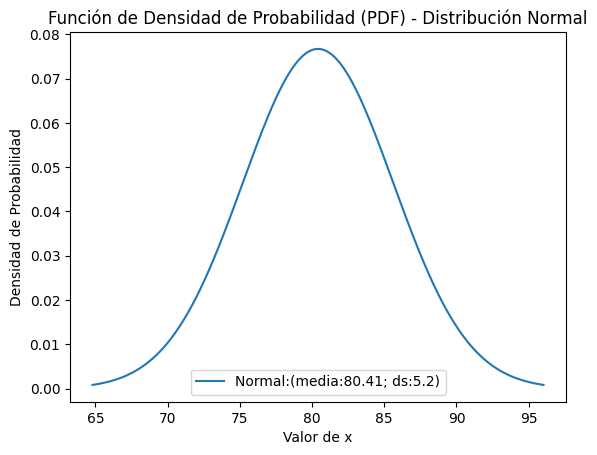

In [7]:
f_visualizar_dens_normal(num_aleatorios)

## Calcular probabilidades

Ahora bien con una densidad calculada de cada uno de los valores aleatrios generdos, ahora se puede calcular probabildia bajo un inetrvalo.

¿Cuál es la probabilidad de encontrar números entre 80 y 85?

$$
F(80 \le x \le 85)
$$

$$
F(x \le 85) - F(x \le 80)
$$

Se utiliza la función *norm.cdf()*, restando la probabilidad acumulada de 85 menos la probabilidad acumulada de 80.

In [8]:
x1 = 80
x2 = 85
probabilidad  = norm.cdf(x2, media, desv_std) - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamnte ", np.round(probabilidad * 100, 2))

La probabilidad entre  80  y  85  es 0.3427 aproximadamnte  34.27


## Visualizar probabildiades

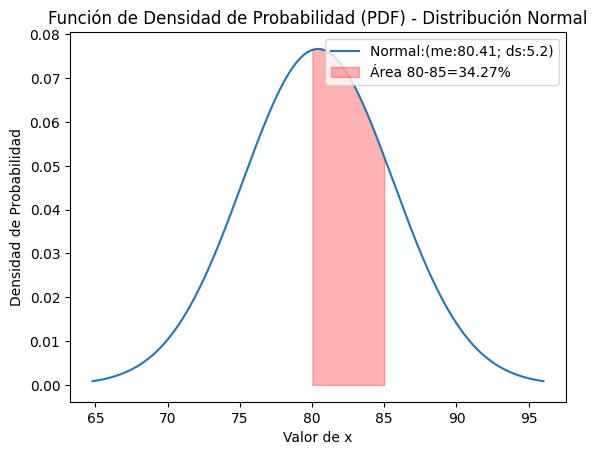

In [9]:
f_visualizar_dens_area_normal(num_aleatorios, x1, x2)

## Ejercicio estaturas pesos y generos de personas

Se carga un archivo con extensión *csv* que contiene medidas de personas. Las variables de interés son estatura en centímetros, peso en kilogramos y género que puede ser Hombre o Mujer.


### Cargar datos y análisis descriptivo

Se cargan datos y se presenta un análisis descriptivo de la cantidad de registros ,los estadísticos básicos de las variables estatura y peso así como la frecuencia por género.

Son $n=507$ registros de los cuales hay $260$ mujeres y $247$ hombres.

La media aritmética de la variable estatura es $171.14$ con desviación estándar de $9.40$; la media de la variable peso es $69.14$ con desviación estándar de $13.34$

     estatura  peso genero_cat
0       174.0  65.6     Hombre
1       175.3  71.8     Hombre
2       193.5  80.7     Hombre
3       186.5  72.6     Hombre
4       187.2  78.8     Hombre
..        ...   ...        ...
502     176.5  71.8      Mujer
503     164.4  55.5      Mujer
504     160.7  48.6      Mujer
505     174.0  66.4      Mujer
506     163.8  67.3      Mujer

[507 rows x 3 columns]
         estatura        peso
count  507.000000  507.000000
mean   171.143787   69.147535
std      9.407205   13.345762
min    147.200000   42.000000
25%    163.800000   58.400000
50%    170.300000   68.200000
75%    177.800000   78.850000
max    198.100000  116.400000
Mujer     260
Hombre    247
Name: genero_cat, dtype: int64


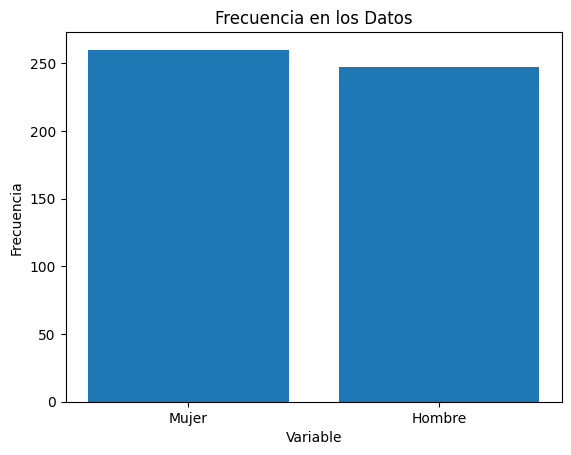

In [10]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/probabilidad-y-estad-stica/master/2023/datos/estatura%20peso%20generos.csv")
print(datos[['estatura', 'peso', 'genero_cat']])

print(datos[['estatura', 'peso']].describe())
# Determinar la frecuencia de cada atributo en la columna 'genero'
frecuencia_genero = datos['genero_cat'].value_counts()

# Imprimir la frecuencia
print(frecuencia_genero)

f_visualizar_frecuencia(frecuencia_genero)


### Valor esperado, varianza y desviación estándar

El valor esperado de una distribución  normal es igual a la media y la varianza es la propia varianza de los datos, así mismo la desvición es´tandra es la rai cuadrada de la varinza.



### Valor esperado

Si se elige a una persona aleatoriamente, ¿cuál será el valor esperado $VE$ de la estatura de la persona?, ¿cuánto puede variar la estatura con respeto al valor esperado $VE$?

El valor esperado es:  171.144  centímetros
En términos de varianza puede variar en: :  88.321
En términos de desvaición estándar puede variar en: :  9.3979  centímetros


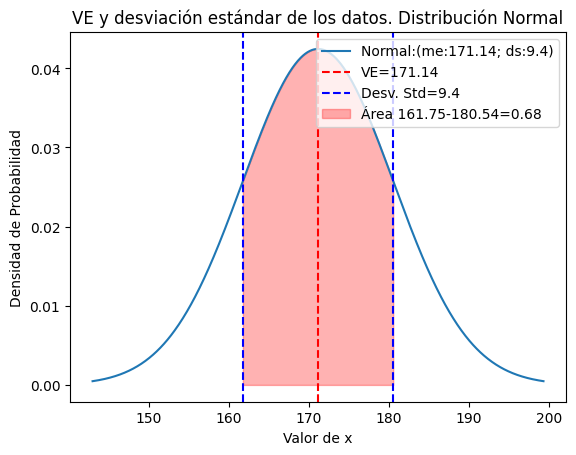

In [11]:
VE = np.mean(datos['estatura'])
print ("El valor esperado es: ", np.round(VE, 3), " centímetros")
varianza = np.var(datos['estatura'], )
print ("En términos de varianza puede variar en: : ", np.round(varianza, 4))
varianza = np.std(datos['estatura'], )
print ("En términos de desvaición estándar puede variar en: : ", np.round(varianza, 4), " centímetros")

f_visualizar_VE_desv_std_normal(datos['estatura'])

Hay un $68\%$ de probabilidad de seleccionar a una persona que tenga de estatura $171.14$ $\pm 9.4$ centímetros.

Se puede concluir en t´merios generales, que la mayoría de las personas tendrán una estatura alrededor de $171$ centímetros, y la mayoría de las diferencias estarán dentro de una desviación estándar de $9.4$ centímetros.

- El $68\%$ de los datos está entre $\mu \pm \sigma$.
- El $95\%$ de los datos está entre $\mu \pm 2 \cdot \sigma$.
- El $99\%$ de los datos está entre $\mu \pm 3 \cdot \sigma$.



### Probabilidades con datos del género hombres

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura mayor que 180 centímetros?



In [12]:
# Filtrar datos para obtener solo los hombres
 #datos_hombres = datos[datos['genero'] == 'Hombre']
datos_hombres = datos.query("genero_cat == 'Hombre'")
#print(datos_hombres['estatura'])
# Media estatura de hombres
media_est_hombres = np.mean(datos_hombres['estatura'])
desv_std_est_hombres = np.std(datos_hombres['estatura'])
print ("La media de estatura hombres", np.round(media_est_hombres, 4))
print ("La desviación estándar de estatura hombres", np.round(desv_std_est_hombres, 4))

La media de estatura hombres 177.7453
La desviación estándar de estatura hombres 7.1691


Con los estadístico de media y desviacón estándar y los valores, visualizar la densidad y el área de hombre con estatura maypr que $180$.

$$
F(x \ge 180)
$$

Restar:

$$
1 - F(x \le 180)
$$

para determinar los que están o son mayores que $180$.


La probabilidad entre  180  y  inf  es 0.3766 aproximadamente  37.66


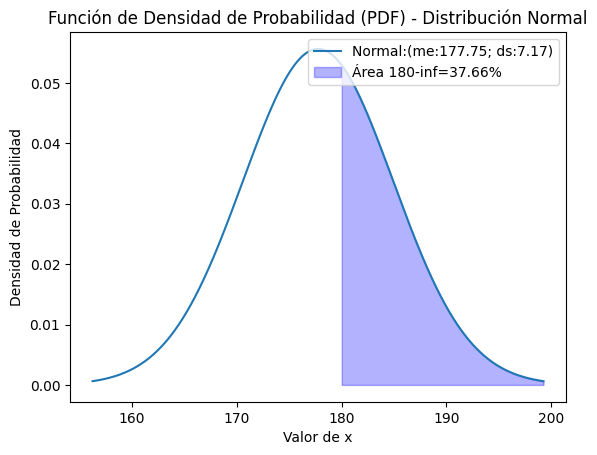

In [13]:
x1 = 180
x2 = np.Inf
probabilidad  = 1 - norm.cdf(x1, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2, v_color = 'blue')

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura entre 160 y 180 centímetros?

$$
F(160 \le x \le 180)
$$

Restar:

$$
F(x \le 180) - F(x \le 160)
$$

para determinar los que están en el intervalo $160$ - $180$

La probabilidad entre  160  y  180  es 0.6168 aproximadamente  61.68


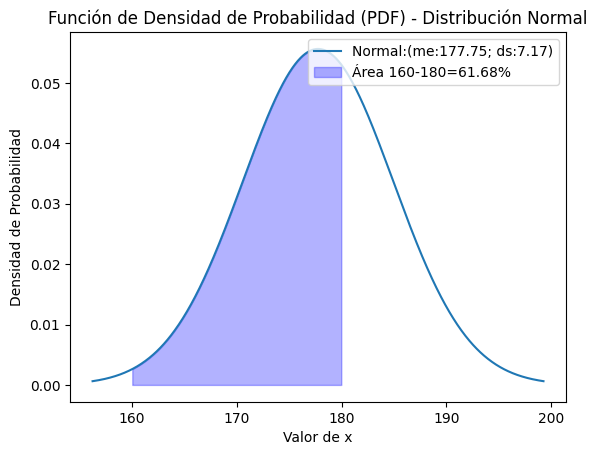

In [14]:
x1 = 160
x2 = 180
probabilidad  = norm.cdf(x2, media_est_hombres, desv_std_est_hombres) - norm.cdf(x1, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2, v_color = 'blue')

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura menor o igual a 165 centímetros?

$$
F(x \le 165)
$$

para determinar los que están en el intervalo por debajo de $165$

La probabilidad entre  -inf  y  165  es 0.0377 aproximadamente  3.77


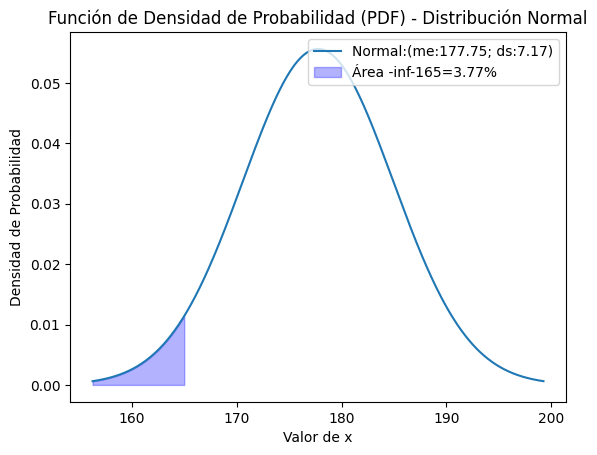

In [15]:
x1 = - np.Inf
x2 = 165
probabilidad  = norm.cdf(x2, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2, v_color = 'blue')

### Probabilidade con datos del género mujeres


#### ¿Cúal es la probabilidad de encontrar personas del género mujeres con estatura mayor que 180 centímetros?

In [16]:
# Filtrar datos para obtener solo las mujeres
datos_mujeres = datos.query("genero_cat == 'Mujer'")

# Media estatura de mujeres
media_est_mujeres = np.mean(datos_mujeres['estatura'])
desv_std_est_mujeres = np.std(datos_mujeres['estatura'])
print ("La media de estatura mujeres", np.round(media_est_mujeres, 4))
print ("La desviación estándar de estatura mujeres", np.round(desv_std_est_mujeres, 4))

La media de estatura mujeres 164.8723
La desviación estándar de estatura mujeres 6.532


Con los estadístico de media y desviacón estándar y los valores, visualizar la densidad y el área de la probabilidad con estatura mayr que $180$ en mujeres:

La probabilidad entre  180  y  inf  es 0.0103 aproximadamente  1.03


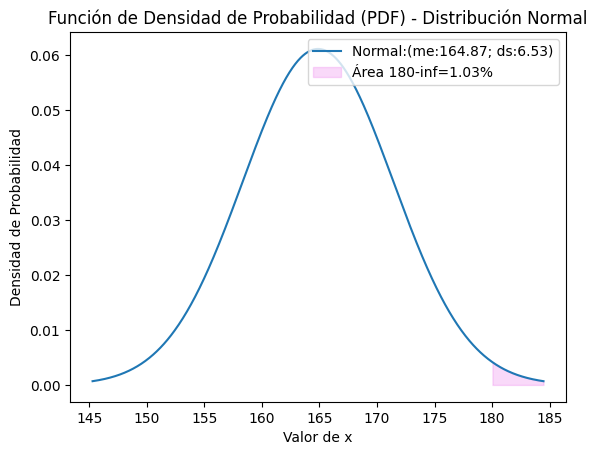

In [17]:
x1 = 180
x2 = np.Inf
probabilidad  = 1 - norm.cdf(x1, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2, v_color = 'violet')

#### ¿Cúal es la probabilidad de encontrar personas del género mujeres con estatura entre 160 y 180 centímetros?



La probabilidad entre  160  y  180  es 0.7619 aproximadamente  76.19


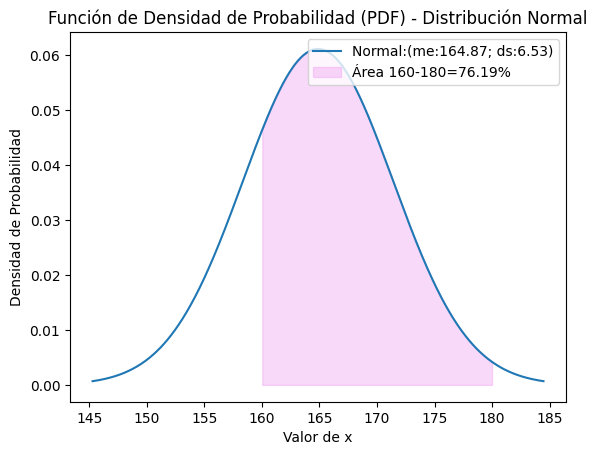

In [18]:
x1 = 160
x2 = 180
probabilidad  = norm.cdf(x2, media_est_mujeres, desv_std_est_mujeres) - norm.cdf(x1, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2, v_color = 'violet')

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura menor o igual a 165 centímetros?

La probabilidad entre  -inf  y  165  es 0.5078 aproximadamente  50.78


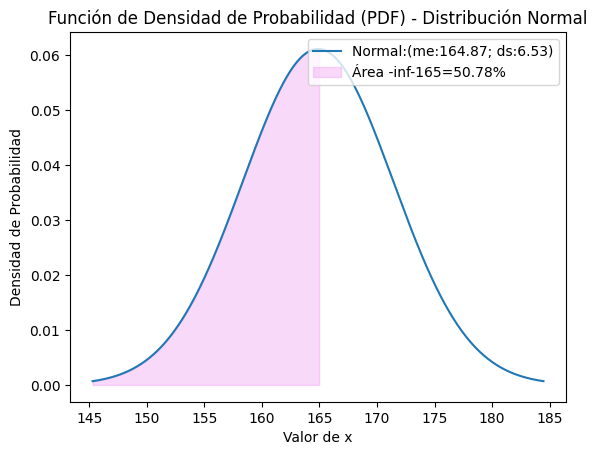

In [19]:
x1 = - np.Inf
x2 = 165
probabilidad  = norm.cdf(x2, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2, v_color = 'violet')

### Con respecto al peso de las personas hombre y mujeres

- ¿cuál es el valor esperado $VE$ si se selecciona a una persona al azar con respecto al peso corporal, independientemente si es hombre o mujer?
- ¿cuál es la varianza del peso corporal de las personas?
- ¿cuál será la desviación estándar con respeco al peso corporal, independientemente si es hombre o mujer ?


####  Con repecto al peso en kilogramos de los hombres

- ¿Cuál es la probabilidad de encontrar hombres con un peso coporal superior a $80$ kilogramos; $1 - F(x \le 80)$
- ¿Cual es la probabilidad de encontrar hombres con un peso corporal entre $70$ y $75$ kilogramos?; $F(70 \le x \le 75)$
- ¿Cuál es la probabilidad de encontrar hombres que pesen menos de $65$ kilogramos?; $F(x \le 65)$

####  Con repecto al peso en kilogramos de las mujeres

- ¿Cuál es la probabilidad de encontrar mujeres con un peso coporal superior a $80$ kilogramos; $1 - F(x \le 80)$
- ¿Cual es la probabilidad de encontrar mujeres con un peso corporal entre $70$ y $75$ kilogramos?; $F(70 \le x \le 75)$
- ¿Cuál es la probabilidad de encontrar mujeres que pesen menos de $65$ kilogramos?; $F(x \le 65)$



## Tiempo de duración de focos

Una empresa de material eléctrico fabrica focos de luz que tienen una duración, antes de quemarse (fundirse), que se distribuye *normalmente* con media igual a $\mu = 800$ horas y una desviación estándar de $\sigma = 40$ horas. Ejercicio extraído de [@walpole_probabilidad_2012].

Encuentre las siguientes probabilidades:

- ¿cuál es la probabilidad de que un foco se queme entre 778 y 834 horas?; $F(778 \le x \le 834)$.
- ¿cuál es la probabilidad de que un foco se queme a más de 850 horas?; $1 - F(x \le 850)$
- ¿cuál es el valor esperado $VE$ y la desviación estándar y qué significan para este contexto?

### Inicializar variables

In [20]:
# Inicializar variables
media = 800
desv_std = 40

# Se generan datos aleatorios con media y desviacin estándar similar
datos = norm.rvs(loc = media, scale = desv_std, size = 100)
print ("Los datos")
print(np.round(datos, 4))

print()
media = np.mean(datos)
desv_std = np.std(datos)

print ("La media de los datos es", np.round(media, 2))
print ("La desviación estándar de los datos es: ", np.round(desv_std, 2))


Los datos
[808.5792 781.0662 876.3196 795.3985 765.3597 786.4823 789.3135 842.5709
 785.8786 748.2343 913.6003 788.4159 821.6904 772.3445 759.4378 750.9209
 759.1159 851.9156 760.3025 812.3623 811.2843 827.2273 813.3223 818.0539
 832.2637 802.4428 788.3974 876.0075 713.5881 768.0243 806.3803 791.8403
 811.1896 763.2711 816.4133 815.5262 845.1816 802.702  796.5011 814.2623
 819.4432 893.2177 780.5837 821.2853 816.2071 718.7059 807.2859 838.8679
 765.9695 736.3631 826.1583 823.0352 755.8232 809.7909 783.5034 817.1223
 749.4021 805.9515 792.3105 794.7854 838.3811 820.4098 852.5082 834.6043
 752.329  769.0467 830.9268 780.9165 828.7106 755.9046 764.7113 821.2922
 832.0869 850.1728 834.3872 788.7841 794.4354 796.2593 815.5307 804.4847
 838.6721 743.6386 769.3351 744.0498 819.0551 843.412  735.2825 831.9722
 737.2831 754.6498 796.9894 805.2057 795.134  770.9421 765.6303 855.7688
 758.5405 776.3385 803.7108 798.3358]

La media de los datos es 799.49
La desviación estándar de los datos es:  37

 ### probabilidad de que un foco se queme entre 778 y 834 horas?;  F(778≤x≤834) .


La probabilidad entre  778  y  834  es 0.5424 aproximadamente  54.24


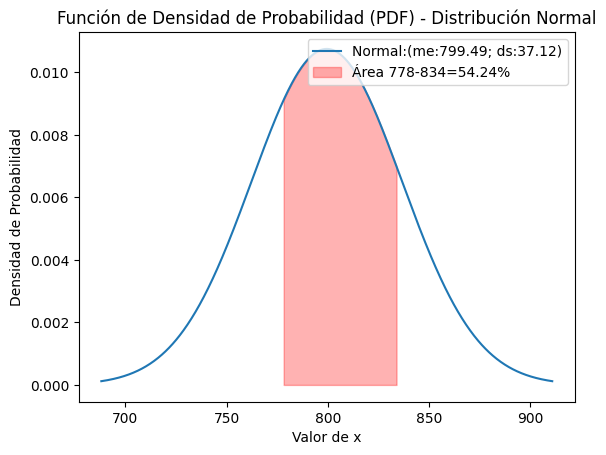

In [21]:
# El intervalo
x1 = 778
x2 = 834

# La probabilidad
probabilidad  = norm.cdf(x2, media, desv_std) - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos, x1, x2, v_color = 'red')

### Probabilidad de que un foco se queme a más de 850 horas?;  1−F(x≤850)

La probabilidad entre  850  y  inf  es 0.0868 aproximadamente  8.68


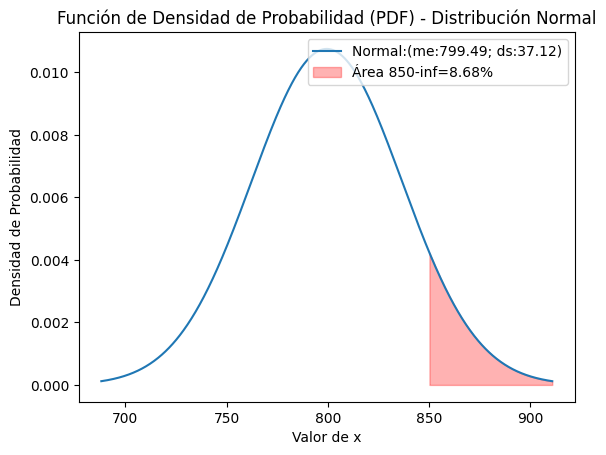

In [22]:
## El intervalo
x1 = 850
x2 = np.Inf

# La probabilidad
probabilidad  = 1 - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos, x1, x2, v_color = 'red')

# Eercicio de los sueldos

Los sueldos mensuales en una empresa siguen una distribución *normal* con media de *16000* pesos, y desviación estándar de 1000 pesos.

- ¿qué porcentaje de trabajadores ganan entre 10000 y 15000 pesos?; $F(10000\le x \le 15000)$
- ¿qué porcentaje de trabajadores ganan menos de 8500 pesos ?; $F(x \le 8500)$
- ¿qué porcentaje de trabajadores ganan más de 10000 pesos; $1 - F(x \le 10000)$ ?
- ¿qué significado tiene el valor esperado y la desviación estándar en este contexto?

## Ejercicio de edade de estudiantes

Un connnto de estudiante se les pide la edad



### Incicialziar datos


In [23]:
datos = [18, 19, 20, 21, 22, 23, 19, 18, 19, 20,
         21, 22, 19, 19, 18, 17, 19, 20, 21, 22, 23, 19, 18, 20]

media = np.mean(datos)
desv_std = np.std(datos)

print ("La media de la edad es: ", media)
print ("La desviación estándar de los datos es :", desv_std)

LA media de la edad es:  19.875
La desviación estándar de los datos es : 1.6409473889596013


### Densidades
- Densidad para $f(x=18)$
- Densidad para $f(x=21)$
- Densidad para $f(x=19.87)$


In [30]:
densidad = f_x_normal(18, media, desv_std)
print ("La la densidadad para valores de x =", 18 ," es ", np.round(densidad, 4))
densidad = f_x_normal(21, media, desv_std)
print ("La la densidadad para valores de x =", 21 ," es ", np.round(densidad, 4))
densidad = f_x_normal(19.87, media, desv_std)
print ("La la densidadad para valores de x =", 19.87 ," es ", np.round(densidad, 4))
densidad = f_x_normal(np.Inf, media, desv_std)
print ("La la densidadad para valores de x =", np.Inf ," es ", np.round(densidad, 4))

La la densidadad para valores de x = 18  es  0.1266
La la densidadad para valores de x = 21  es  0.1922
La la densidadad para valores de x = 19.87  es  0.2431
La la densidadad para valores de x = inf  es  0.0


### Visualizar la densidad de los datos


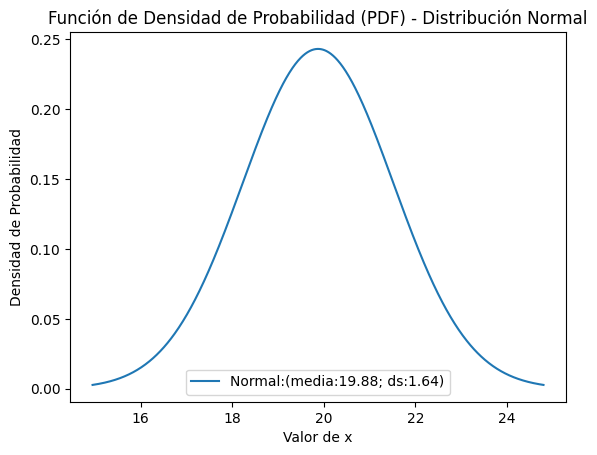

In [31]:
f_visualizar_dens_normal(datos)

#### Probabilidad F(18 ≤  x ≤ 20 )

¿Cual es la  probabilida de elegir aleatoriamente una persona que tenga edad entre $18$ y $20$ años.




La probabilidad entre  18  y  20  es 0.4038 aproximadamente  40.38


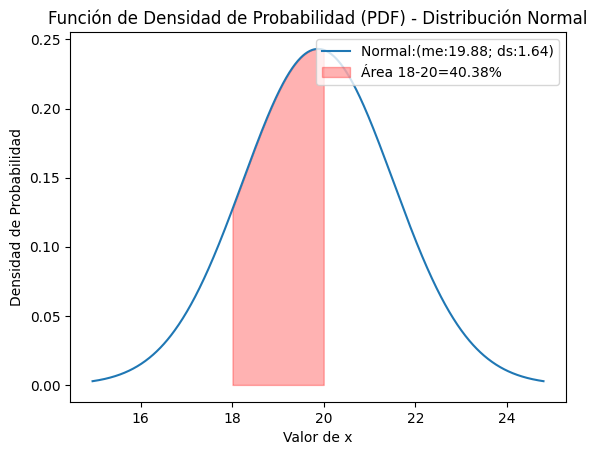

In [34]:
## El intervalo
x1 = 18
x2 = 20

# La probabilidad
probabilidad  = norm.cdf(x2, media, desv_std) - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos, x1, x2, v_color = 'red')


¿Cual es la  probabilida de elegir aleatoriamente una persona que tenga edad entre $18$ y $20$ años.
#### Probabilidad F(x ≥ 19.87 )

La probabilidad entre  19.875  y  inf  es 0.5 aproximadamente  50.0


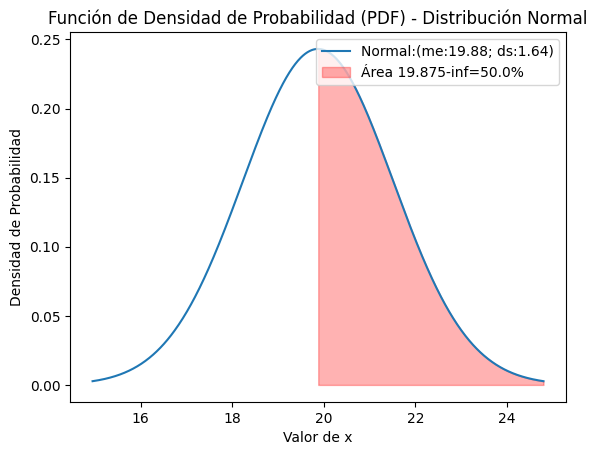

In [36]:
## El intervalo
x1 = media
x2 = np.Inf

# La probabilidad
probabilidad  = 1 - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos, x1, x2, v_color = 'red')

# Interpretación del caso

Con los datos de estatura y peso corporal de personas cargados en el caso:

- ¿Qué es más probable: encontrar hombres por que midan por encima del $180$ centímetros de estatura o mujeres por encima del $180$ centímetros de estatura?, Con las probabilidades calculadas responda la pregunta. **Resp**: Existe una probabilidad del $37$% de encontrar hombres con estatura superior al 180 centímetros en relación al $1.03$% de encontrar mujeres por encima del $180$ centímetros de estatura por lo que es más probable que se dé la primera aseveración.

- ¿Qué es más probable: encontrar hombres por que midan por debajo o igual a $165$ centímetros de estatura o mujeres por debajo o igual a $165$ centímetros de estatura?, Con las probabilidades calculadas responda la pregunta. Es más probable encontrar mujeres con estatura por debajo del $165$ centímeros con el $50.78$% aproximadamente en relación al $3.77$% de encontrar hombres por debajo de $165$ centímetros aproximadamente.

Las probabilidades se calcularon en relación a los datos cargados.

- ¿Qué es más probable, encontrar hombres con peso superior a $80$ kilogramos o mujeres con peso superior a $80$ kilogramos?; con las probabilidades calculadas se responde la pregunta.

- Qué es más probable, encontrar hombres con un peso corporal menor a $65$ kilogramos o mujeres con peso corporal menor a $65$ kilogramos?. Con las probabilidades calculadas se responde la pregunta.

Con el ejercicio de la duración de los focos

- ¿cuál es la probabilidad de que un foco se queme entre 778 y 834 horas?;  F(778≤x≤834).
- ¿cuál es la probabilidad de que un foco se queme a más de 850 horas?;  1−F(x≤850)
- ¿cuál es el valor esperado  VE  y la desviación estándar y qué significan para este contexto?

Con el ejercicio de los sueldos:

- ¿qué porcentaje de trabajadores ganan entre 10000 y 15000 pesos?; $F(10000\le x \le 15000)$
- ¿qué porcentaje de trabajadores ganan menos de 8500 pesos ?; $F(x \le 8500)$
- ¿qué porcentaje de trabajadores ganan más de 10000 pesos; $1 - F(x \le 10000)$ ?
- ¿qué significado tiene el valor esperado y la desviación estándar en este contexto?


# Bibliografía

- UC3M. n.d. “Introducción a La Estadística y Probabilidad.” http://halweb.uc3m.es/esp/Personal/personas/mwiper/docencia/Spanish/Introduction_to_Statistics/intro_continuous2.pdf.

- Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estadística Para Ingeniería y Ciencias. Novena Edición. México: Pearson.